Requirements: python version >=3.8 , statsmodels 0.12.1 (Tested on Ubuntu 20.04 and Windows 10), using anoconda virtual enviromens strongly recomended

In [1]:
import argparse
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import warnings

In [2]:
# df = pd.read_csv('SG.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
df = pd.read_csv('SG.csv',delimiter=';')

load and plot data from SG.csv

In [3]:
df.head()

,Time,Consumption,Grid consumption,Grid backflow,PV generation,Battery charging,Battery discharging
0,2022-03-05T08:30:00+01:00,64271.779712,59611.639881,0.0,1155.158681,0.0,3461.813704
1,2022-03-05T09:00:00+01:00,73479.560484,68433.723571,0.0,1594.969056,0.0,4079.943209
2,2022-03-05T09:30:00+01:00,83463.478524,72519.254048,0.0,2015.292333,0.0,9322.759101
3,2022-03-05T10:00:00+01:00,77097.835603,71244.783571,0.0,2144.178222,0.0,4177.316192
4,2022-03-05T10:30:00+01:00,80078.206568,71724.207800,0.0,4037.172414,0.0,4617.098633


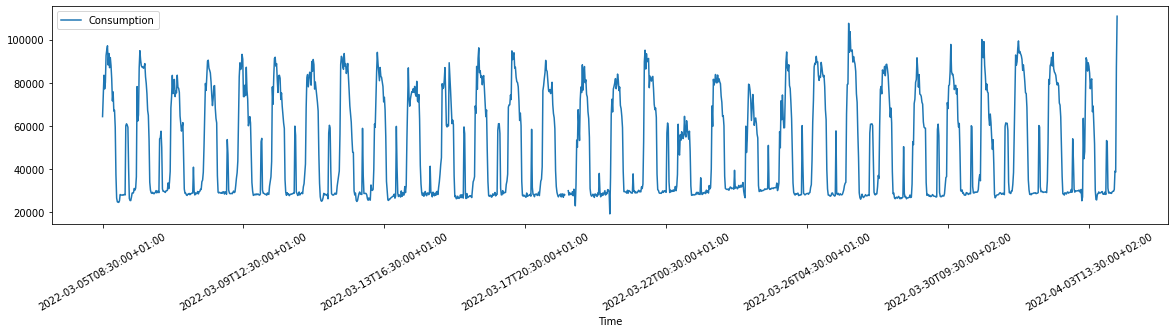

In [4]:
s1=df.plot(x='Time', y='Consumption',figsize=(20, 4),  rot=30)

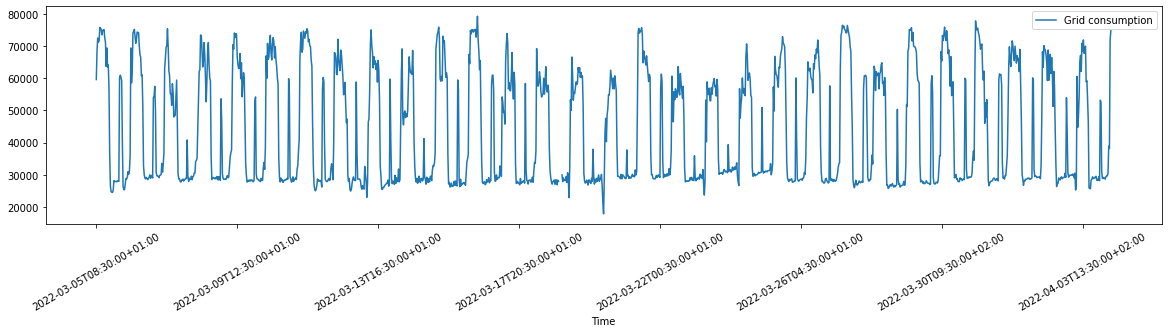

In [5]:
s2=df.plot(x='Time', y='Grid consumption',figsize=(20, 4),  rot=30)

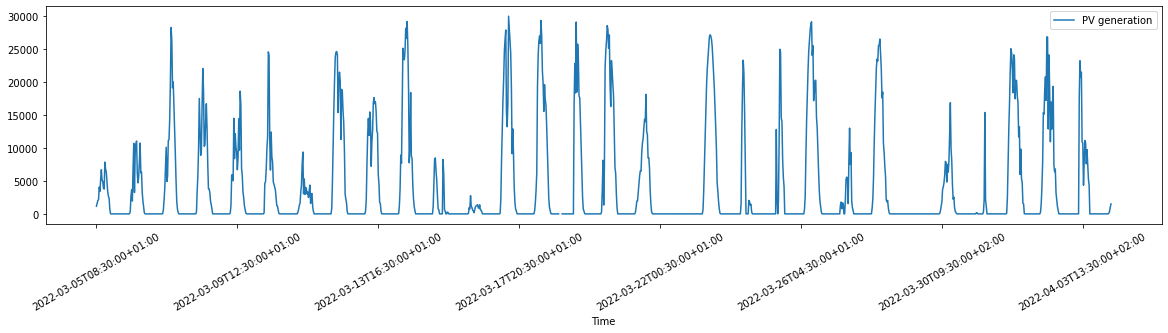

In [6]:
s2=df.plot(x='Time', y='PV generation',figsize=(20, 4),  rot=30)

In [7]:
df.isnull().sum()
dfs=df.dropna(axis=0)


The statsmodel library provides the capability to fit ARIMA models
ARIMA Model Results 

In [10]:
import argparse
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import warnings


# df = pd.read_csv('SG.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
def fit_to_model(data_set):
    print("Available list ")
    for col_name in data_set.columns:
        print(col_name)
#     data=input("Please select quantity: " + (data_set. columns))
    data=input("Please select quantity: " )
    dts= data_set[data]
    dts.isnull().sum()
    dfs=dts.dropna(axis=0)
    model = ARIMA((dfs), order=(0,1,2))
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
#     model_fit.plot_predict()
    predicted =model_fit.predict(1, 1441, None,'levels',dynamic=False)
    result=pd.DataFrame(df.Time)
    result['Predicted'] = predicted
    result[data] = dfs
    result.plot('Time',figsize=(20, 4),  rot=15 )
    plt.grid('on')
    plt.show()
    return model_fit, dfs

Available list 
Time
Consumption
Grid consumption
Grid backflow
PV generation
Battery charging
Battery discharging
Please select quantity: Consumption
                             ARIMA Model Results                              
Dep. Variable:          D.Consumption   No. Observations:                 1436
Model:                 ARIMA(0, 1, 2)   Log Likelihood              -15044.458
Method:                       css-mle   S.D. of innovations           8584.369
Date:                Mon, 11 Apr 2022   AIC                          30096.916
Time:                        10:55:27   BIC                          30117.995
Sample:                             1   HQIC                         30104.786
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.4164    259.034

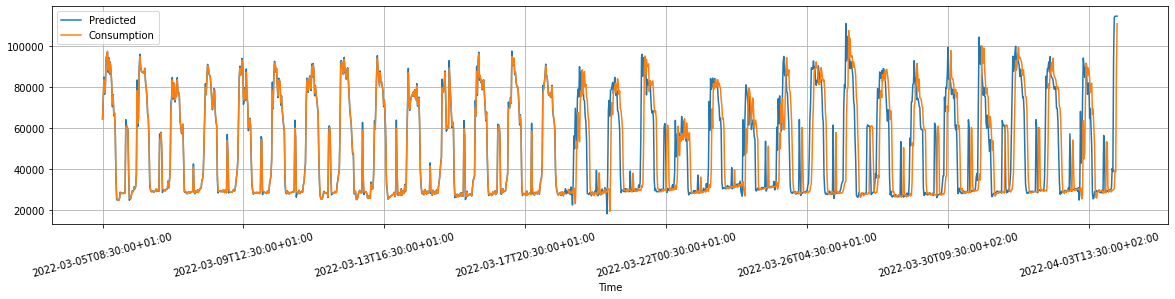

(<statsmodels.tsa.arima_model.ARIMAResultsWrapper at 0x1d7b5c5a2b0>,
 0        64271.779712
 1        73479.560484
 2        83463.478524
 3        77097.835603
 4        80078.206568
             ...      
 1436     30475.396429
 1437     39011.790411
 1438     38536.480855
 1439     87121.507746
 1440    110821.688532
 Name: Consumption, Length: 1437, dtype: float64)

In [11]:
warnings.filterwarnings("ignore")
fit_to_model(df)